In [15]:
from collections import Counter
from Bio import SeqIO
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
used_classes = {
    'Actinopteri_186623',
    'Aves_8782',
    'Mammalia_40674',
    'Lepidosauria_8504',
    'Amphibia_8292',
    'Chondrichthyes_7777',
}

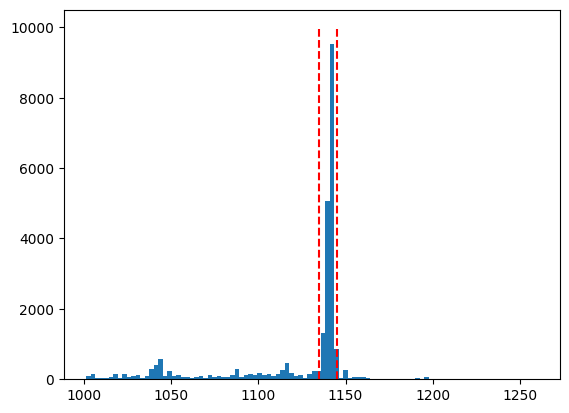

In [3]:
cytb_longest = SeqIO.parse('./vert_data/MIDORI2_LONGEST_NUC_GB264_Cytb_BLAST.fasta', 'fasta')
human_size = 1140
shift = 5
sizes = []
classes = []
verts = []
for rec in cytb_longest:
    if 'Chordata_7711' in rec.name:
        classes.append(rec.name.split(';')[3])
        sizes.append(len(rec))
        if human_size-shift < len(rec) < human_size+shift and rec.name.split(';')[3] in used_classes:
            verts.append(rec)
plt.hist([x for x in sizes if x > 1000], bins=100)
plt.vlines([human_size-shift, human_size+shift], 0, 10000, 'r', '--')
random.shuffle(verts)

In [4]:
Counter(classes)

Counter({'Actinopteri_186623': 13355,
         'Aves_8782': 7282,
         'Mammalia_40674': 5199,
         'Lepidosauria_8504': 4615,
         'Amphibia_8292': 3265,
         'Chondrichthyes_7777': 407,
         'class_Testudines_8459': 355,
         'Ascidiacea_7713': 52,
         'Hyperoartia_117569': 45,
         'class_Crocodylia_1294634': 27,
         'Cladistia_1338366': 12,
         'Leptocardii_2682552': 8,
         'Thaliacea_30304': 7,
         'Myxini_117565': 6,
         'class_Ceratodontiformes_2823314': 4,
         'class_Coelacanthiformes_7894': 2})

In [5]:
len(sizes), len(verts)

(34641, 16078)

[SeqRecord(seq=Seq('ATTGTTATGTTTCGTAAAAATGAACTTGTTAGTCTTTTTTTAAGATCATTTAGT...GAT'), id='OUTGRP|HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', name='HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', description='HG931923.1.7035.8148###root_1;Eukaryota_2759;Chordata_7711;Ascidiacea_7713;Stolidobranchia_7720;Styelidae_7721;Botryllus_30300;Botryllus_schlosseri_30301', dbxrefs=[])]

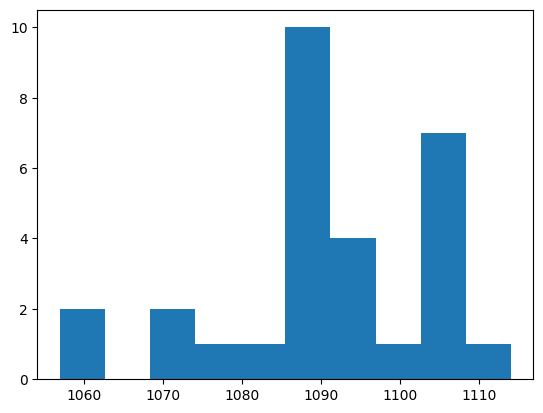

In [7]:
cytb_longest = SeqIO.parse('./vert_data/MIDORI2_LONGEST_NUC_GB264_Cytb_BLAST.fasta', 'fasta')
human_size = 1140
shift = 30
outgrp = []
sizes = []
for rec in cytb_longest:
    if 'Ascidiacea_7713' in rec.name and len(rec) > 1000:
        sizes.append(len(rec))
        if human_size-shift < len(rec) < human_size+shift and rec.name.split(';')[3]:
            outgrp.append(rec)
            break
plt.hist(sizes)
outgrp[0].id = 'OUTGRP|' + outgrp[0].id
outgrp

In [8]:
SeqIO.write(outgrp + verts[:2000], 'vert_data/chordates2k.fa', 'fasta-2line')

2001

In [9]:
Counter(outgrp[0].seq)

Counter({'T': 517, 'A': 279, 'G': 176, 'C': 142})

In [22]:
taxa = pd.DataFrame([x.name.split(';') for x in verts]).iloc[:, 3:]
taxa

,3,4,5,6,7
0,Mammalia_40674,Eulipotyphla_9362,Soricidae_9376,Crocidura_36801,Crocidura_suaveolens_52631
1,Aves_8782,Passeriformes_9126,Paridae_9153,Cyanistes_156562,Cyanistes_cyanus_156570
2,Mammalia_40674,Rodentia_9989,Muridae_10066,Niviventer_69082,Niviventer_culturatus_332666
3,Actinopteri_186623,Cypriniformes_7952,Leuciscidae_2743726,Squalius_233201,Squalius_prespensis_882992
4,Aves_8782,Passeriformes_9126,Phylloscopidae_1607688,Phylloscopus_9181,Phylloscopus_pulcher_56434
...,...,...,...,...,...
16073,Actinopteri_186623,Acanthuriformes_1489937,Acanthuridae_29146,Naso_75027,Naso_unicornis_175444
16074,Aves_8782,Galliformes_8976,Phasianidae_9005,Lophophorus_9039,Lophophorus_impejanus_9040
16075,Aves_8782,Passeriformes_9126,Thraupidae_400783,Stilpnia_2986137,Stilpnia_cayana_2986138
16076,Mammalia_40674,Rodentia_9989,Heteromyidae_10015,Perognathus_37442,Perognathus_alticolus_323380


In [ ]:
# TODO prepare one species from genus

In [26]:
taxa[6].value_counts()

Etheostoma_54318      135
Sebastes_34820        101
Ctenotus_204894        93
Myotis_9434            93
Cobitis_47718          82
                     ... 
Pelomys_121574          1
Genyochromis_57302      1
Alloophorus_208312      1
Dacnomys_332663         1
Wattsia_182663          1
Name: 6, Length: 5095, dtype: int64